In [81]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [2]:
dataset = pd.read_csv("/Users/rishavdas/Downloads/anime_data.csv")

In [3]:
dataset.head()

,title,description,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,Fullmetal Alchemist: Brotherhood,The foundation of alchemy is based on the law ...,TV,64,NaN,False,Spring,1,Bones,0,...,0,0,0,0,0,0,0,0,0,0
1,your name.,Mitsuha and Taki are two total strangers livin...,Movie,1,107.0,False,is_missing,0,Others,0,...,1,0,0,0,0,0,0,0,0,0
2,A Silent Voice,"After transferring into a new school, a deaf g...",Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,...,0,0,0,0,0,0,0,0,0,0
3,Haikyuu!! Karasuno High School vs Shiratorizaw...,"Picking up where the second season ended, the ...",TV,10,NaN,False,Fall,0,Production I.G,0,...,0,0,0,0,0,0,0,0,0,0
4,Attack on Titan 3rd Season: Part II,The battle to retake Wall Maria begins now! Wi...,TV,10,NaN,False,Spring,0,Others,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
dataset.columns

Index(['title', 'description', 'mediaType', 'eps', 'duration', 'ongoing',
       'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab',
       'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating',
       'votes', 'tag_Based_on_a_Manga', 'tag_Comedy', 'tag_Action',
       'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen', 'tag_Original_Work',
       'tag_Non_Human_Protagonists', 'tag_Drama', 'tag_Adventure',
       'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_School_Life',
       'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life', 'tag_Seinen',
       'tag_Supernatural', 'tag_Magic', 'tag_Animal_Protagonists', 'tag_Ecchi',
       'tag_Mecha', 'tag_Based_on_a_Light_Novel', 'tag_CG_Animation',
       'tag_Superpowers', 'tag_Others', 'tag_missing'],
      dtype='object')

In [5]:
dataset.rating.value_counts()


2.190    10
2.976    10
2.807     8
3.267     8
3.338     7
         ..
1.084     1
4.234     1
1.030     1
1.002     1
1.292     1
Name: rating, Length: 3305, dtype: int64

In [6]:
dataset.shape

(12101, 44)

In [7]:
dataset.isna().sum()

title                            0
description                   4468
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_primary                   0
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes  

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12101 entries, 0 to 12100
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   title                       12101 non-null  object 
 1   description                 7633 non-null   object 
 2   mediaType                   12101 non-null  object 
 3   eps                         12101 non-null  int64  
 4   duration                    7465 non-null   float64
 5   ongoing                     12101 non-null  bool   
 6   sznOfRelease                12101 non-null  object 
 7   years_running               12101 non-null  int64  
 8   studio_primary              12101 non-null  object 
 9   studios_colab               12101 non-null  int64  
 10  contentWarn                 12101 non-null  int64  
 11  watched                     12101 non-null  float64
 12  watching                    12101 non-null  int64  
 13  wantWatch                   121

In [9]:
dataset.isnull().sum()

title                            0
description                   4468
mediaType                        0
eps                              0
duration                      4636
ongoing                          0
sznOfRelease                     0
years_running                    0
studio_primary                   0
studios_colab                    0
contentWarn                      0
watched                          0
watching                         0
wantWatch                        0
dropped                          0
rating                           0
votes                            0
tag_Based_on_a_Manga             0
tag_Comedy                       0
tag_Action                       0
tag_Fantasy                      0
tag_Sci_Fi                       0
tag_Shounen                      0
tag_Original_Work                0
tag_Non_Human_Protagonists       0
tag_Drama                        0
tag_Adventure                    0
tag_Family_Friendly              0
tag_Short_Episodes  

In [11]:
dataset.columns.__len__()

44

In [13]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
eps,12101.0,13.393356,57.925097,1.000,1.000,2.000,12.000,2527.000
duration,7465.0,24.230141,31.468171,1.000,4.000,8.000,30.000,163.000
years_running,12101.0,0.283200,1.152234,0.000,0.000,0.000,0.000,51.000
studios_colab,12101.0,0.051649,0.221326,0.000,0.000,0.000,0.000,1.000
contentWarn,12101.0,0.115362,0.319472,0.000,0.000,0.000,0.000,1.000
watched,12101.0,2862.605694,7724.347024,0.000,55.000,341.000,2026.000,161567.000
watching,12101.0,256.334435,1380.840902,0.000,2.000,14.000,100.000,74537.000
wantWatch,12101.0,1203.681431,2294.327380,0.000,49.000,296.000,1275.000,28541.000
dropped,12101.0,151.568383,493.931710,0.000,3.000,12.000,65.000,19481.000
rating,12101.0,2.949037,0.827385,0.844,2.304,2.965,3.616,4.702


In [14]:
cat_columns = dataset.select_dtypes(exclude=np.number).columns
cat_columns

Index(['title', 'description', 'mediaType', 'ongoing', 'sznOfRelease',
       'studio_primary'],
      dtype='object')

In [18]:
for column in cat_columns:
    print(f"value counts for {column}")
    print(dataset[column].value_counts())
    print("---"*50)

value counts for title
The Legend of the Legendary Heroes: Iris Report    1
Machine Robo: Revenge of Chronos                   1
Prince of Tennis: Two Samurai The First Game       1
Levius                                             1
Machine Hayabusa                                   1
                                                  ..
Monkey Magic                                       1
Animal Dance                                       1
Hidamari Sketch x SP                               1
Cardfight!! Vanguard G                             1
Osomatsu-kun (1988)                                1
Name: title, Length: 12101, dtype: int64
------------------------------------------------------------------------------------------------------------------------------------------------------
value counts for description
In 19th century Belgium, in the Flanders countryside, lived a young boy with an artistic flair named Nello, and his faithful companion Patrash. Though poor in the physical s

In [19]:
dataset.drop(columns = ['title', "description"], axis=1, inplace=True)

In [20]:
dataset.head()

,mediaType,eps,duration,ongoing,sznOfRelease,years_running,studio_primary,studios_colab,contentWarn,watched,...,tag_Supernatural,tag_Magic,tag_Animal_Protagonists,tag_Ecchi,tag_Mecha,tag_Based_on_a_Light_Novel,tag_CG_Animation,tag_Superpowers,tag_Others,tag_missing
0,TV,64,NaN,False,Spring,1,Bones,0,1,103707.0,...,0,0,0,0,0,0,0,0,0,0
1,Movie,1,107.0,False,is_missing,0,Others,0,0,58831.0,...,1,0,0,0,0,0,0,0,0,0
2,Movie,1,130.0,False,is_missing,0,Kyoto Animation,0,1,45892.0,...,0,0,0,0,0,0,0,0,0,0
3,TV,10,NaN,False,Fall,0,Production I.G,0,0,25134.0,...,0,0,0,0,0,0,0,0,0,0
4,TV,10,NaN,False,Spring,0,Others,0,1,21308.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
dataset.rating.describe()

count    12101.000000
mean         2.949037
std          0.827385
min          0.844000
25%          2.304000
50%          2.965000
75%          3.616000
max          4.702000
Name: rating, dtype: float64

In [22]:
dataset.dropna(inplace=True)
dataset.shape

(7465, 42)

In [23]:
def continous_Univariate_analysis(data,
                                  feature,
                                  figsize=(12, 7),
                                  kde=False,
                                  bins=None):
    """
    boxplot - outliers

    Histograms - distribution 
    
    """
    f2, (ax_box2,
         ax_hist2) = plt.subplots(nrows=2,
                                  sharex=True,
                                  gridspec_kw={"height_ratios": (0.25, 0.75)},
                                  figsize=figsize)
    sns.color_palette("crest", as_cmap=True)
    sns.boxplot(data=data,
                x=feature,
                ax=ax_box2,
                showmeans=True,
                color="violet")
    sns.histplot(
        data=data, x=feature, ax=ax_hist2, kde=kde, bins=bins,
        color="crest") if bins else sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2)
    ax_hist2.axvline(data[feature].mean(), color='green', linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="red", linestyle="-")

In [24]:
def discrete_univariate_analysis(data, feature, perc=False, n=None):
    total = len(data[feature])
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="flare",
        order=data[feature].value_counts().index[:n].sort_values(ascending=False))
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)
        else:
            label = p.get_height()
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(label, (x, y),
                    ha="center",
                    va="center",
                    size=12,
                    xytext=(0, 5),
                    textcoords="offset points")
    plt.show()

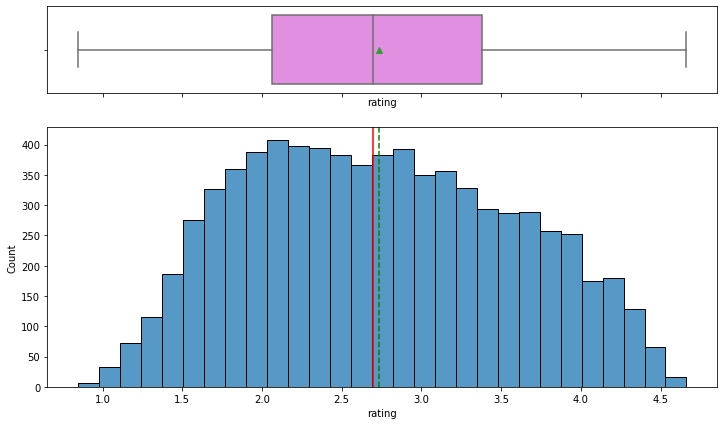

In [27]:
continous_Univariate_analysis(dataset, "rating")

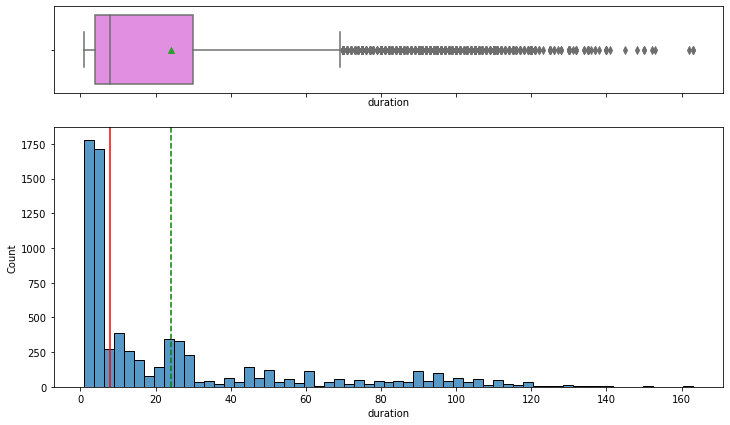

In [28]:
continous_Univariate_analysis(dataset, "duration")

In [33]:
dataset[dataset['duration'] >= 80]['rating'].mean()

3.569473225404726

In [35]:
dataset[dataset['duration'] >= 110]['rating'].mean()

3.7585191256830592

In [36]:
dataset[dataset['duration']<=20]['rating'].mean()

2.431079856721454

In [39]:
dataset[dataset['duration']<=90]['rating'].mean()

2.659106900043391

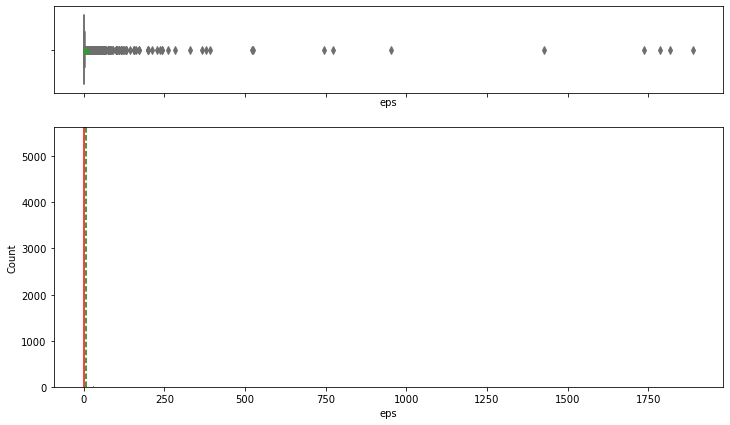

In [43]:
continous_Univariate_analysis(dataset, "eps")

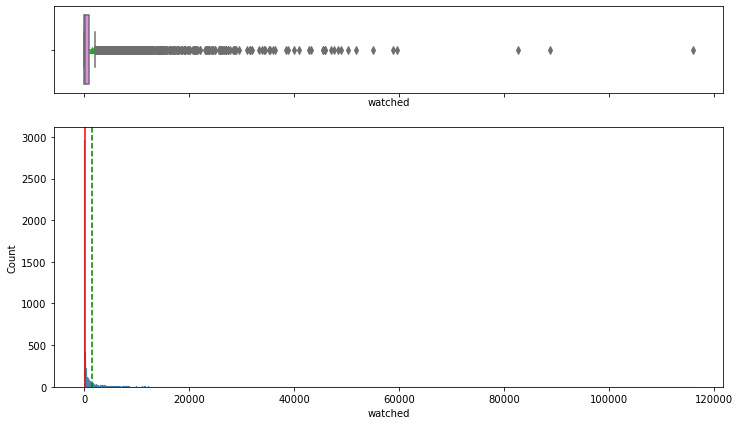

In [44]:
continous_Univariate_analysis(dataset, "watched")

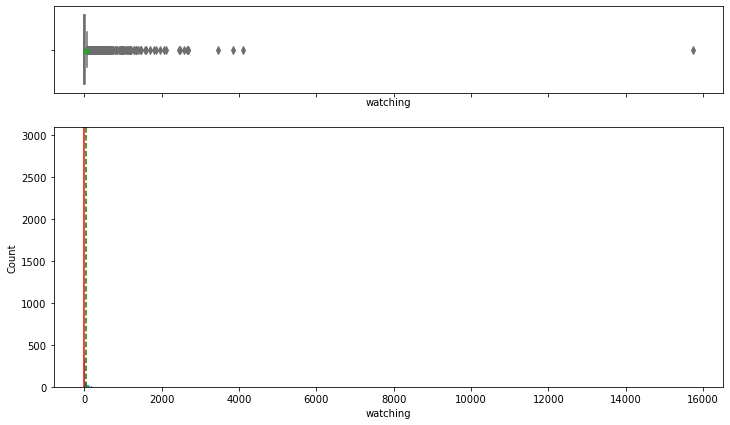

In [45]:
continous_Univariate_analysis(dataset, "watching")

In [46]:
cat_columns

Index(['title', 'description', 'mediaType', 'ongoing', 'sznOfRelease',
       'studio_primary'],
      dtype='object')

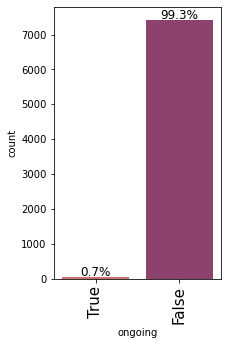

In [47]:
discrete_univariate_analysis(dataset,"ongoing", perc=True )

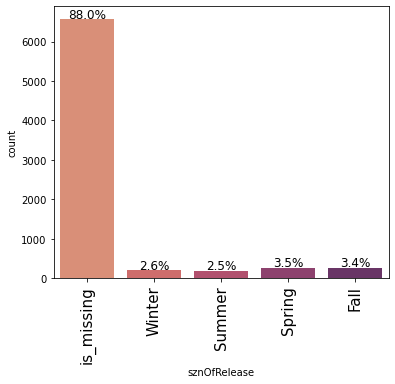

In [48]:
discrete_univariate_analysis(dataset,"sznOfRelease", perc=True )

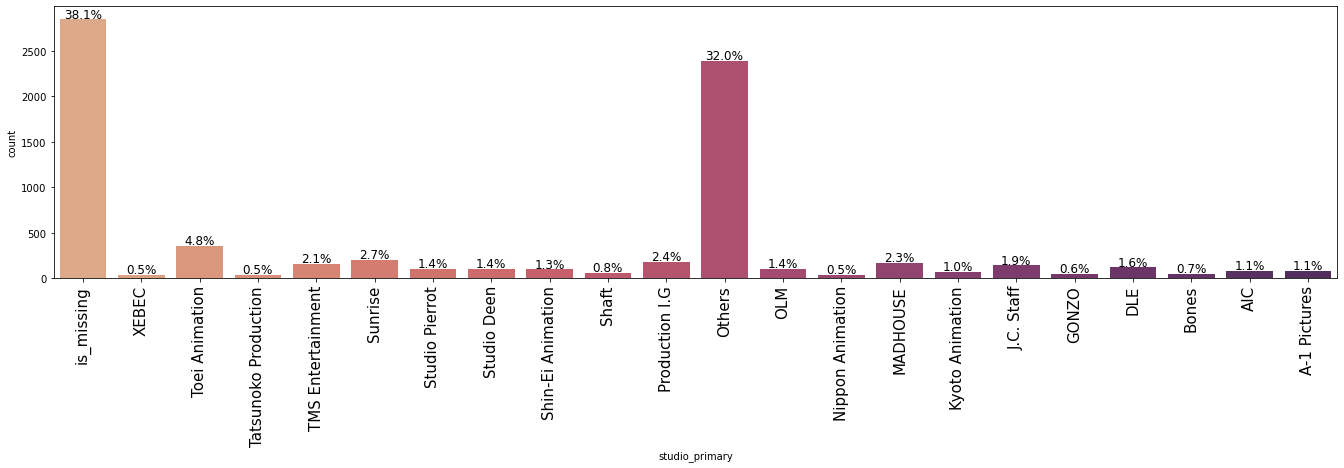

In [49]:
discrete_univariate_analysis(dataset,"studio_primary", perc=True )

In [51]:
dataset[dataset['rating']>=4 ]['studio_primary'].value_counts()

Others                  218
Production I.G           48
is_missing               40
TMS Entertainment        34
MADHOUSE                 34
Sunrise                  28
Kyoto Animation          23
A-1 Pictures             21
Studio Deen              21
Bones                    21
Toei Animation           20
Shaft                    19
J.C. Staff               18
Studio Pierrot           14
Nippon Animation          2
XEBEC                     2
Shin-Ei Animation         2
Tatsunoko Production      2
OLM                       2
GONZO                     1
Name: studio_primary, dtype: int64

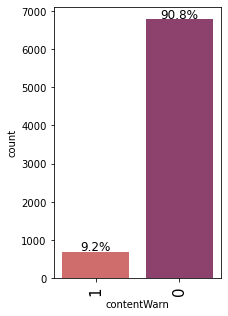

In [52]:
discrete_univariate_analysis(dataset,"contentWarn", perc=True )

In [54]:
corr_cols = [item for item in dataset.columns if "tag" not in item]

In [55]:
print(corr_cols)

['mediaType', 'eps', 'duration', 'ongoing', 'sznOfRelease', 'years_running', 'studio_primary', 'studios_colab', 'contentWarn', 'watched', 'watching', 'wantWatch', 'dropped', 'rating', 'votes']


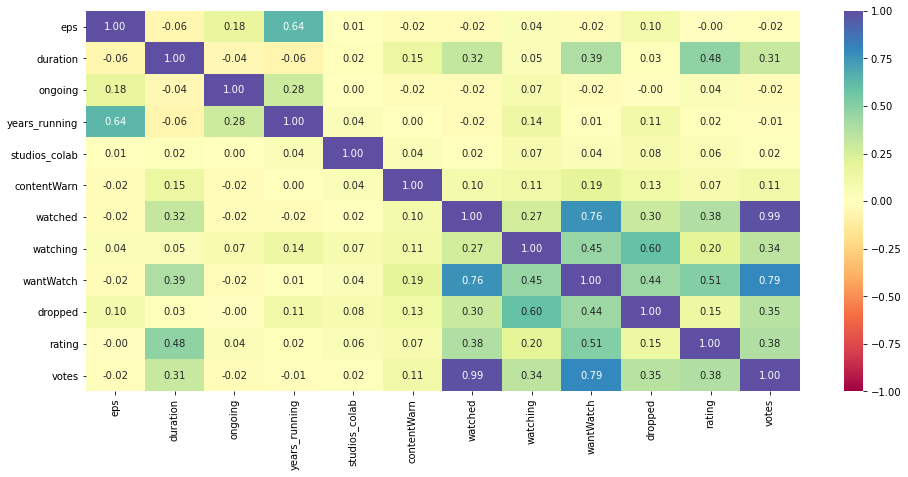

In [58]:
plt.figure(figsize=(16, 7))
sns.heatmap(
    dataset[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [69]:
dataset.drop(['years_running'], axis=1, inplace=True)

In [70]:
dataset.columns

Index(['mediaType', 'eps', 'duration', 'sznOfRelease', 'studio_primary',
       'studios_colab', 'contentWarn', 'watched', 'watching', 'wantWatch',
       'dropped', 'rating', 'votes', 'tag_Based_on_a_Manga', 'tag_Comedy',
       'tag_Action', 'tag_Fantasy', 'tag_Sci_Fi', 'tag_Shounen',
       'tag_Original_Work', 'tag_Non_Human_Protagonists', 'tag_Drama',
       'tag_Adventure', 'tag_Family_Friendly', 'tag_Short_Episodes',
       'tag_School_Life', 'tag_Romance', 'tag_Shorts', 'tag_Slice_of_Life',
       'tag_Seinen', 'tag_Supernatural', 'tag_Magic',
       'tag_Animal_Protagonists', 'tag_Ecchi', 'tag_Mecha',
       'tag_Based_on_a_Light_Novel', 'tag_CG_Animation', 'tag_Superpowers',
       'tag_Others', 'tag_missing'],
      dtype='object')

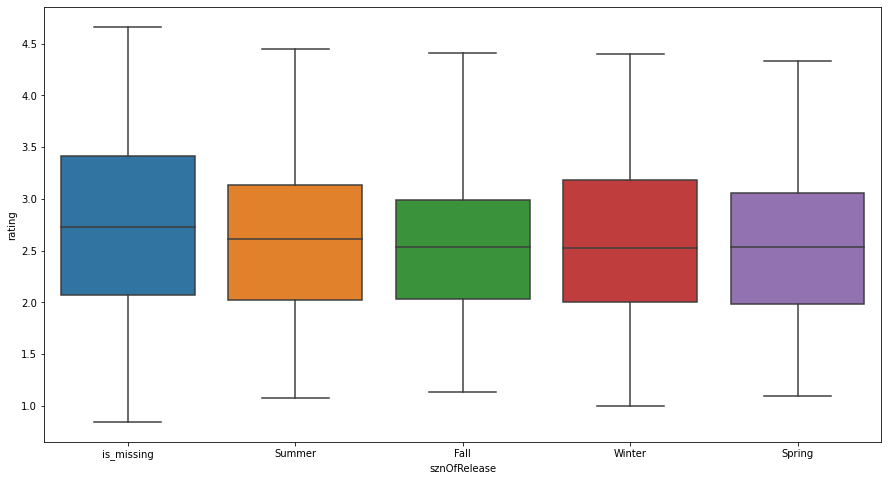

In [71]:
plt.figure(figsize=(15, 8))
sns.boxplot(x="sznOfRelease", y="rating", data=dataset)
plt.show()

# Model Building -- 

In [72]:
X = dataset.drop(['rating'], axis=1)
Y = dataset['rating']

In [74]:
X = pd.get_dummies(X, columns=X.select_dtypes(include = ['object', 'category']).columns.tolist(), drop_first=True)
X.head()

,eps,duration,studios_colab,contentWarn,watched,watching,wantWatch,dropped,votes,tag_Based_on_a_Manga,...,studio_primary_Shaft,studio_primary_Shin-Ei Animation,studio_primary_Studio Deen,studio_primary_Studio Pierrot,studio_primary_Sunrise,studio_primary_TMS Entertainment,studio_primary_Tatsunoko Production,studio_primary_Toei Animation,studio_primary_XEBEC,studio_primary_is_missing
1,1,107.0,0,0,58831.0,1453,21733,124,43960,0,...,0,0,0,0,0,0,0,0,0,0
2,1,130.0,0,1,45892.0,946,17148,132,33752,1,...,0,0,0,0,0,0,0,0,0,0
8,1,111.0,0,0,8454.0,280,6624,150,6254,1,...,0,0,0,0,1,0,0,0,0,0
27,1,125.0,0,0,115949.0,589,12388,161,82752,0,...,0,0,0,0,0,0,0,0,0,0
31,1,117.0,0,0,35896.0,538,15651,130,26465,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

In [79]:
print("Number of rows in training data", X_train.shape[0])
print("Number of rows in test data", X_test.shape[0])


Number of rows in training data 5225
Number of rows in test data 2240


In [80]:
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [82]:
def Model_preformance(model, predictor, target):
    pred = model.predict(predictor)
    r2 = r2_score(target, pred)
    rmse = np.sqrt(mean_squared_error(target, pred))
    mae = mean_absolute_error(target, pred)
    
    results = pd.DataFrame(
    {
        
        "RMSE":rmse,
        "MAE":mae, 
        "R-SQUARE":r2
    
    }, index=[0]
    
    )
    
    return results

In [83]:
print("Training Data Performance : ")
lin_model_trn = Model_preformance(lin_model, X_train, Y_train)
lin_model_trn

Training Data Performance : 


,RMSE,MAE,R-SQUARE
0,0.57917,0.468283,0.518398


In [84]:
print("Test Data Performance : ")
lin_model_tst = Model_preformance(lin_model, X_test, Y_test)
lin_model_tst

Test Data Performance : 


,RMSE,MAE,R-SQUARE
0,0.570929,0.464549,0.5126


# Feature Selection Technique:
    
    1. Sequential Selector - small amount of data 
    2. Grid Search - very expensive search 
    3. Baseain Search - faster but tends to overfit 
    

In [85]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

reg = LinearRegression()

sfs = SFS(reg,
          k_features=X_train.shape[1],
          forward=True,
          floating=False,
          scoring="r2",
          n_jobs=-1,
          verbose=2,
          cv=5)

sfs = sfs.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  54 out of  69 | elapsed:    2.8s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    2.8s finished

[2022-07-24 22:43:51] Features: 1/69 -- score: 0.261089359587903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  53 out of  68 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.2s finished

[2022-07-24 22:43:52] Features: 2/69 -- score: 0.3522663085348248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.2s finished

[2022-07-24 22:43:52] Features: 3/69 -- score: 0.400505641101646[Parallel(n_job

[Parallel(n_jobs=-1)]: Done  26 out of  41 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  41 out of  41 | elapsed:    1.0s finished

[2022-07-24 22:44:04] Features: 29/69 -- score: 0.5023824312694107[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.0s finished

[2022-07-24 22:44:05] Features: 30/69 -- score: 0.5027563289085251[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  39 | elapsed:    0.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  39 out of  39 | elapsed:    1.0s finished

[2022-07-24 22:44:06] Features: 31/69 -- score: 0.503257911465188[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  38 | elapsed:    1.0s finished

[2022-07-24 22:44:07] Features: 32/69 -- score: 0.5036650769916683[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 con

[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    0.3s finished

[2022-07-24 22:44:27] Features: 59/69 -- score: 0.5035861416091848[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.3s finished

[2022-07-24 22:44:27] Features: 60/69 -- score: 0.5032621870747997[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    0.3s finished

[2022-07-24 22:44:28] Features: 61/69 -- score: 0.5029077231710967[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 ou

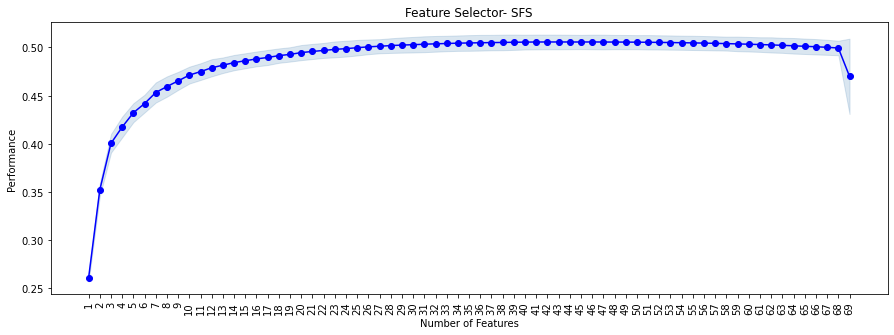

In [86]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15,5))
plt.title("Feature Selector- SFS")
plt.xticks(rotation = 90)
plt.show()

In [87]:
reg = LinearRegression()

sfs = SFS(reg,
          k_features=30,
          forward=True,
          floating=False,
          scoring="r2",
          n_jobs=-1,
          verbose=2,
          cv=5)

sfs = sfs.fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  69 out of  69 | elapsed:    0.3s finished

[2022-07-24 22:49:23] Features: 1/30 -- score: 0.261089359587903[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  68 out of  68 | elapsed:    0.2s finished

[2022-07-24 22:49:23] Features: 2/30 -- score: 0.3522663085348248[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  67 out of  67 | elapsed:    0.3s finished

[2022-07-24 22:49:23] Features: 3/30 -- score: 0.400505641101646[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  66 out of 

[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.0s finished

[2022-07-24 22:49:36] Features: 30/30 -- score: 0.5027563289085251

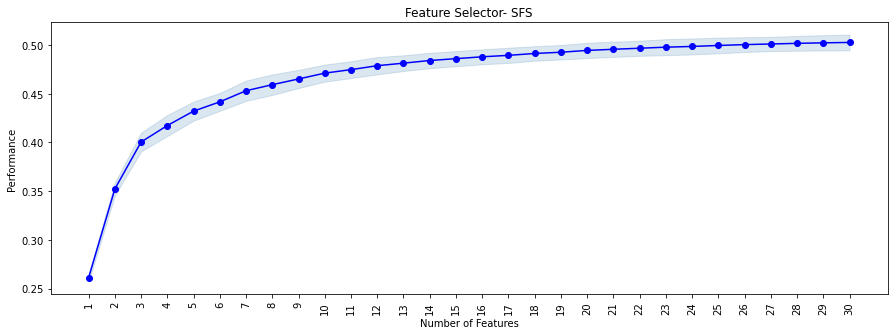

In [88]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15,5))
plt.title("Feature Selector- SFS")
plt.xticks(rotation = 90)
plt.show()

In [89]:
feature_index = list(sfs.k_feature_idx_)
print(feature_index)

[0, 1, 3, 4, 6, 8, 9, 11, 12, 14, 17, 19, 20, 23, 24, 25, 26, 31, 36, 38, 39, 40, 48, 50, 52, 57, 62, 64, 66, 68]


In [90]:
X_train.columns[feature_index]

Index(['eps', 'duration', 'contentWarn', 'watched', 'wantWatch', 'votes',
       'tag_Based_on_a_Manga', 'tag_Action', 'tag_Fantasy', 'tag_Shounen',
       'tag_Drama', 'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_Shorts',
       'tag_Slice_of_Life', 'tag_Seinen', 'tag_Supernatural',
       'tag_Based_on_a_Light_Novel', 'mediaType_Movie', 'mediaType_OVA',
       'mediaType_Other', 'mediaType_TV', 'studio_primary_AIC',
       'studio_primary_DLE', 'studio_primary_J.C. Staff',
       'studio_primary_Others', 'studio_primary_Studio Pierrot',
       'studio_primary_TMS Entertainment', 'studio_primary_Toei Animation',
       'studio_primary_is_missing'],
      dtype='object')

In [91]:
X_train_final = X_train[X_train.columns[feature_index]]
X_test_final = X_test[X_train_final.columns]

In [92]:
lin_model_v2 = LinearRegression()
lin_model_v2.fit(X_train_final, Y_train)

LinearRegression()

In [94]:
print("Training Data Performance : ")
lin_model_trn = Model_preformance(lin_model_v2, X_train_final, Y_train)
lin_model_trn

Training Data Performance : 


,RMSE,MAE,R-SQUARE
0,0.584631,0.473872,0.509274


In [95]:
print("Test Data Performance : ")
lin_model_tst = Model_preformance(lin_model_v2, X_test_final, Y_test)
lin_model_tst

Test Data Performance : 


,RMSE,MAE,R-SQUARE
0,0.578521,0.470941,0.499552


In [96]:
X_train_final.columns

Index(['eps', 'duration', 'contentWarn', 'watched', 'wantWatch', 'votes',
       'tag_Based_on_a_Manga', 'tag_Action', 'tag_Fantasy', 'tag_Shounen',
       'tag_Drama', 'tag_Family_Friendly', 'tag_Short_Episodes', 'tag_Shorts',
       'tag_Slice_of_Life', 'tag_Seinen', 'tag_Supernatural',
       'tag_Based_on_a_Light_Novel', 'mediaType_Movie', 'mediaType_OVA',
       'mediaType_Other', 'mediaType_TV', 'studio_primary_AIC',
       'studio_primary_DLE', 'studio_primary_J.C. Staff',
       'studio_primary_Others', 'studio_primary_Studio Pierrot',
       'studio_primary_TMS Entertainment', 'studio_primary_Toei Animation',
       'studio_primary_is_missing'],
      dtype='object')